# <center> Tarea 1 <center>
##### <center> Gustavo Antonio Soto Torres <center>

In [1]:
import random
mi_semilla_asignada = 19
random.seed(mi_semilla_asignada)
algoritmos = ['Perceptron','KNN','Regresion Logistica','SVM Kernel lineal',
'Random Forest','SVM Kernel no lineal','Arbol de Decision']
asignados = random.sample(algoritmos,k=3)
print("Mis algoritmos asignados son: \t",asignados)

Mis algoritmos asignados son: 	 ['SVM Kernel no lineal', 'Perceptron', 'Random Forest']


Librerías:

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

1. Leer la base de datos y almacenarla como un objeto DataFrame de Pandas.
Mostrar estad´ısticas descriptivas de los datos y generar un gr´afico de tortas
que muestre el porcentaje del total de datos que pertenece a cada clase y
la cantidad de datos en las clases.

Lectura de datos:

In [3]:
df=pd.read_csv("desafio1.csv")

Estadisticas descriptivas por columnas:

In [23]:
df.describe()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col2.1,col13,col14,col15,col16,class
count,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,1.221900e+04,12219.000000
mean,-6.307531e-13,1.913738e-15,4.943677e-15,-2.175997e-15,-1.591583e-15,9.339939e-15,-9.668999e-16,-2.958487e-15,7.035719e-15,-4.475782e-16,-2.773132e-15,8.993361e-16,1.349483e-14,3.628300e-15,6.479436e-16,-1.374438e-14,0.526311
std,1.771044e+03,4.060168e+01,3.033986e+01,2.079600e+01,1.463176e+01,1.237660e+01,9.947385e+00,8.794881e+00,7.720631e+00,7.070037e+00,6.622048e+00,6.197803e+00,5.898404e+00,5.537911e+00,5.367500e+00,5.205060e+00,0.499328
min,-3.215002e+03,-8.234705e+01,-7.663188e+01,-6.366942e+01,-4.460410e+01,-4.741168e+01,-3.846725e+01,-3.332998e+01,-3.343610e+01,-3.034360e+01,-3.110183e+01,-2.929475e+01,-3.136731e+01,-3.172294e+01,-2.449263e+01,-2.879841e+01,0.000000
25%,-1.527250e+03,-3.345794e+01,-2.741397e+01,-1.507583e+01,-1.061320e+01,-8.439584e+00,-6.559292e+00,-6.226877e+00,-5.431583e+00,-3.645304e+00,-2.944676e+00,-3.797916e+00,-3.471450e+00,-2.861255e+00,-3.532482e+00,-3.033015e+00,0.000000
50%,-5.797416e-03,-5.368655e+00,-3.451920e-01,-3.376398e+00,-1.629645e+00,-1.303072e+00,-5.419920e-01,-4.820456e-01,-2.748362e-01,-8.234637e-02,2.301157e-01,1.168603e-01,5.906104e-02,-1.936942e-01,-2.261829e-01,-1.817478e-01,1.000000
75%,1.527240e+03,2.877879e+01,2.009263e+01,1.386965e+01,8.686272e+00,8.401221e+00,6.476544e+00,6.077144e+00,5.287385e+00,3.965215e+00,3.195794e+00,3.698425e+00,3.743215e+00,2.714833e+00,3.487121e+00,3.033918e+00,1.000000
max,3.215007e+03,2.204068e+02,9.052155e+01,7.248711e+01,6.060830e+01,5.447463e+01,4.273434e+01,3.537719e+01,4.127726e+01,3.203633e+01,3.836186e+01,3.943600e+01,3.263311e+01,5.044380e+01,2.657115e+01,3.923529e+01,1.000000


Grafico de torta sobre la columna "class"

In [4]:
df["class"].value_counts()

1    6431
0    5788
Name: class, dtype: int64

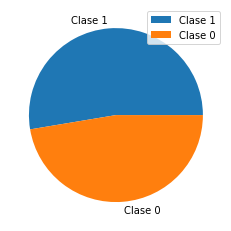

In [21]:
plt.pie([df["class"].sum(),-df["class"].sum()+len(df["class"])],labels=["Clase 1","Clase 0"])
plt.legend()
plt.show()

2. Generar los conjuntos (X, y) y realizar un muestreo aleatorio simple y estratificado,
tomando el 30% de los datos para construir el conjunto de test.
Con el 70% de datos restantes, construir el conjunto de entrenamiento.
Mostrar en gr´aficos de tortas las distribuciones de los datos en las clases
de los conjuntos de test y de entrenamiento.

Separamos el Data Frame en dos partes: "y" que corresponde a las etiquetas de clase y "x" que corresponde a los datos.

In [28]:
y=df["class"]
x=df.drop(columns=["class"])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y)

Grfico de tortas para conjunto de testeo:

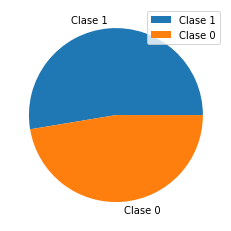

In [31]:
plt.pie([y_test.sum(),-y_test.sum()+len(y_test)],labels=["Clase 1","Clase 0"])
plt.legend()
plt.show()

Gráfico de torta para conjunto de entrenamiento:

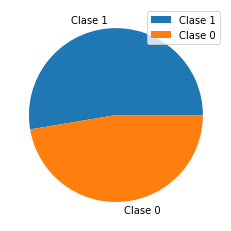

In [32]:
plt.pie([y_train.sum(),-y_train.sum()+len(y_train)],labels=["Clase 1","Clase 0"])
plt.legend()
plt.show()

1. Con el conjunto de entrenamiento generado en la pregunta anterior, obtener
tres modelos de clasificaci´on usando los algoritmos asignados. Describir
los hiperpar´ametros utilizados. Recuerde estandarizar los datos en el caso
que sea necesario.

# Random Forest

In [40]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

Para buscar los mejores hiperparámetros se realizo una busqueda mallada usando grid_search de SkLearn:

In [46]:
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [None,1,2,3,4, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda de parámetros
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los resultados
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores hiperparámetros: ", best_params)
print("Mejor puntuación: ", best_score)

Mejores hiperparámetros:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntuación:  0.9931020811330878


# SVM Kernel no lineal